# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,774,94,37,72,146,60,9,133,50,18,135,161,262,128,69,2,7,192,195
1,561,88,39,88,194,69,8,168,40,20,133,199,416,151,74,3,22,186,192
2,519,88,39,76,155,62,8,137,48,18,137,156,281,124,63,3,6,201,209
3,128,97,45,88,173,67,10,157,43,20,157,173,365,157,67,8,12,192,200
4,226,107,54,98,210,66,11,218,31,24,169,221,704,216,71,14,0,188,197
5,179,89,44,70,137,58,6,136,49,18,146,168,273,166,78,10,3,186,187
6,633,102,52,101,213,64,10,203,33,23,157,214,616,186,65,0,19,193,203
7,700,106,53,98,192,58,11,217,31,24,166,228,693,191,71,11,24,188,198
8,523,90,43,81,231,97,46,150,45,19,149,200,332,164,91,5,9,186,196
9,681,96,46,70,194,70,6,167,39,20,148,183,427,171,69,17,10,200,203


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,418.138434,93.610200,44.770492,81.976321,168.573770,61.690346,8.657559,168.366120,41.060109,20.544627,147.894353,188.311475,437.258652,174.076503,72.550091,6.559199,12.613843,188.981785,195.670310
std,239.693606,8.404963,6.174335,15.922067,34.001939,8.227974,4.958150,33.163976,7.764440,2.582986,14.538765,31.629462,176.430758,32.197860,7.910756,5.102834,8.959370,6.198631,7.576294
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,216.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,318.000000,150.000000,67.000000,2.000000,6.000000,185.000000,190.000000
50%,417.000000,92.000000,44.000000,80.000000,167.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,177.000000,362.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,622.000000,100.000000,49.000000,98.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,217.000000,584.000000,197.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [5]:
from sklearn.preprocessing import StandardScaler

# Scale data before using
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 500 итераций не хватало
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)

In [36]:
# Find optimal hyperparameters for logistic regression with cross-validation on the train data
param_grid = {'C': [0.1, 1.0, 10, 15, 20, 30, 50, 100, 150, 200, 500, 1000] }

grid = GridSearchCV(estimator=logreg,
                    param_grid=param_grid,
                    cv=5)

grid_result = grid.fit(X_train, y_train)

print('Best parameters: ', grid_result.best_params_)

Best parameters:  {'C': 0.1}


In [8]:
logreg = LogisticRegression(C=grid_result.best_params_['C'], multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)

In [9]:
# Estimate the model quality with f1 and accuracy scores
from sklearn.metrics import classification_report

clf = logreg.fit(X_train_scaled, y_train)
print("Accuracy test score: ", clf.score(X_test_scaled, y_test))

y_pred = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Accuracy test score:  0.7171717171717171
              precision    recall  f1-score   support

         bus       0.86      0.91      0.88        76
        opel       0.67      0.44      0.53        85
        saab       0.50      0.58      0.54        69
         van       0.82      1.00      0.90        67

    accuracy                           0.72       297
   macro avg       0.71      0.73      0.71       297
weighted avg       0.71      0.72      0.71       297



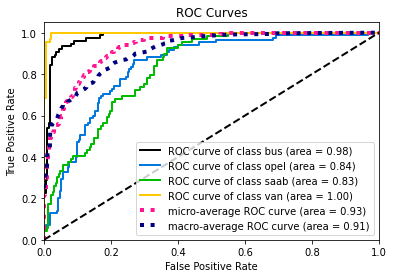

In [10]:
import scikitplot as skplt
import matplotlib.pyplot as plt

# Plot a ROC-curve for the trained model
y_probas = logreg.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [11]:
# Normalize data to produce a reasonable covariance analysis
# therefore put all attributes in the range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0, 1])

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

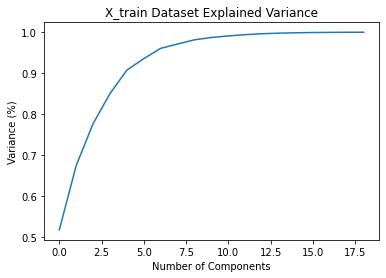

In [12]:
# Fit the PCA algorithm with data
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_scaled)

# Plot the сumulative сum of the explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('X_train Dataset Explained Variance')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Из графика становится понятно, что хватит 9 компонент.

In [13]:
# Perform the PCA transformation

pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [15]:
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)

In [16]:
# Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA train data

param_grid = {'C': [0.001, 0.01, 0.1, 1.0, 10, 15, 20, 30, 50, 100, 150, 200, 500, 1000] }
grid = GridSearchCV(estimator=logreg,
                    param_grid=param_grid,
                    cv=5)
grid_result = grid.fit(X_train_pca, y_train)

print('Best score: ', grid_result.best_score_)
print('Best parameters: ', grid_result.best_params_)

Best score:  0.7013010842368641
Best parameters:  {'C': 30}


In [17]:
logreg = LogisticRegression(C=grid_result.best_params_['C'], multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

In [18]:
# Estimate the model quality with f1 and accuracy scores

clf = logreg.fit(X_train_pca, y_train)
print("Accuracy test score: ", clf.score(X_test_pca, y_test))

y_pred = logreg.predict(X_test_pca)
print(classification_report(y_test, y_pred))

Accuracy test score:  0.6801346801346801
              precision    recall  f1-score   support

         bus       0.77      0.84      0.81        76
        opel       0.59      0.39      0.47        85
        saab       0.47      0.57      0.51        69
         van       0.88      0.99      0.93        67

    accuracy                           0.68       297
   macro avg       0.68      0.70      0.68       297
weighted avg       0.67      0.68      0.67       297



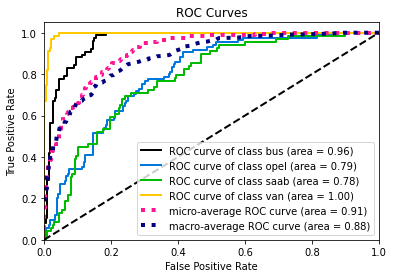

In [19]:
# Plot a ROC-curve for the trained model
y_probas = logreg.predict_proba(X_test_pca)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
# Train a desicion tree on the same data
# Find optimal tree depth (max_depth) using cross-validation.

decTree = DecisionTreeClassifier(random_state=0)

param_grid = {'max_depth': [1, 2, 4, 8, 16, 32, 64, 128, 25, 80]}
grid = GridSearchCV(estimator=decTree,
                    param_grid=param_grid, 
                    cv=5)
grid_result = grid.fit(X_train_pca, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.6139449541284405
Best Params:  {'max_depth': 8}


In [22]:
# Measure the model quality using the same metrics you used above

decTree = DecisionTreeClassifier(max_depth=grid_result.best_params_['max_depth'])

clf = decTree.fit(X_train_pca, y_train)
print("Accuracy test score: ", clf.score(X_test_pca, y_test))

y_pred = decTree.predict(X_test_pca)
print(classification_report(y_test, y_pred))

Accuracy test score:  0.632996632996633
              precision    recall  f1-score   support

         bus       0.78      0.82      0.80        76
        opel       0.51      0.36      0.42        85
        saab       0.42      0.51      0.46        69
         van       0.82      0.90      0.86        67

    accuracy                           0.63       297
   macro avg       0.63      0.65      0.63       297
weighted avg       0.63      0.63      0.63       297



#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score

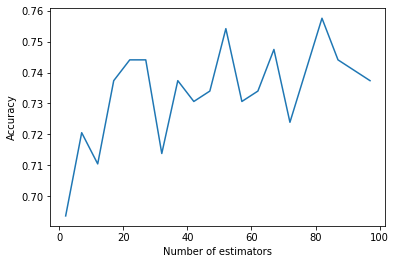

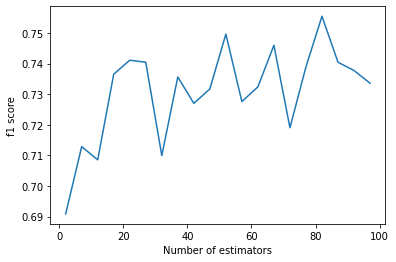

In [24]:
# Decision tree

estimators = list(range(2, 100, 5))
accuracy = []
f1 = []

for n_estimators in estimators:
    decTree_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=grid_result.best_params_['max_depth']),
                                   n_estimators=n_estimators)
    decTree_clf.fit(X_train, y_train)
    
    acc = decTree_clf.score(X_test, y_test)
    accuracy.append(acc)
    
    y_pred = decTree_clf.predict(X_test)
    f1_sc = f1_score(y_test, y_pred, average="macro")
    f1.append(f1_sc)

plt.plot(estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

plt.plot(estimators, f1)
plt.xlabel("Number of estimators")
plt.ylabel("f1 score")
plt.show()

Видно,что увеличение имеет форму логарифма. Имеет смысл остановиться на количестве алгоритмов = 27~30

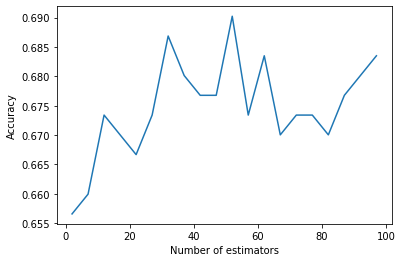

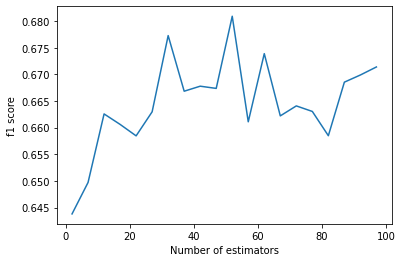

In [26]:
# Logistic regression

logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1500)

estimators = list(range(2, 100, 5))
accuracy = []
f1 = []

for n_estimators in estimators:
    logreg_clf = BaggingClassifier(logreg,
                                   n_estimators=n_estimators)
    
    logreg_clf.fit(X_train, y_train)
    
    acc = logreg_clf.score(X_test, y_test)
    accuracy.append(acc)
    
    y_pred = logreg_clf.predict(X_test)
    f1_sc = f1_score(y_test, y_pred, average="macro")
    f1.append(f1_sc)

plt.plot(estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()


plt.plot(estimators, f1)
plt.xlabel("Number of estimators")
plt.ylabel("f1 score")
plt.show()

Аналогично предыдущему, имеет смысл остановиться на количестве алгоритмов = 52~50

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

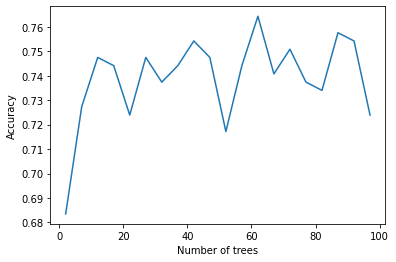

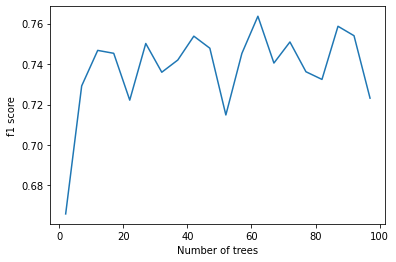

In [28]:
from sklearn.ensemble import RandomForestClassifier

num_of_trees = list(range(2, 100, 5))
accuracy_rf = []
f1_rf = []

for n_estimators in num_of_trees:
    random_forest_clf = RandomForestClassifier(n_estimators=n_estimators)
    random_forest_clf.fit(X_train, y_train)
    
    acc = random_forest_clf.score(X_test, y_test)
    accuracy_rf.append(acc)
    
    y_pred = random_forest_clf.predict(X_test)
    f1_sc = f1_score(y_test, y_pred, average="macro")
    f1_rf.append(f1_sc)

plt.plot(estimators, accuracy_rf)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.show()

plt.plot(estimators, f1_rf)
plt.xlabel("Number of trees")
plt.ylabel("f1 score")
plt.show()

Оптимальное число деревьев = 22. Число близко к оптимальному числу алгоритмов при сипользовании решающих деревьев,
а довольно сильно отличается от метода, использовавшего лог.регрессию

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [30]:
logreg_cf = LogisticRegression(C=20, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)
decTree_cf = DecisionTreeClassifier(max_depth=64)
rf_cf = RandomForestClassifier(n_estimators=n_estimators)

In [31]:
# Split the training data into 10 equal (almost) parts

indexes = np.linspace(0, X_train.shape[0], num=10, dtype=int)[1:]
print(indexes)

[ 61 122 183 244 305 366 427 488 549]


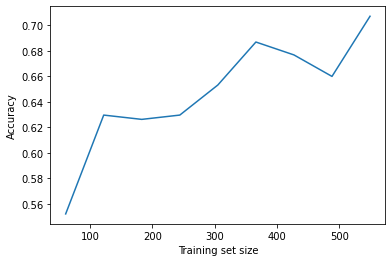

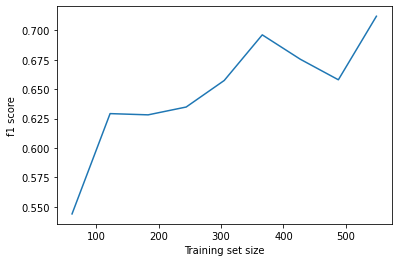

In [32]:
# Decision tree
accuracy_decTree = []
f1_decTree = []

for border in indexes:
    decTree_cf.fit(X_train[:border,], y_train[:border])
    acc = decTree_cf.score(X_test, y_test)
    accuracy_decTree.append(acc)
    
    y_pred = decTree_cf.predict(X_test)
    f1_sc = f1_score(y_test, y_pred, average="macro")
    f1_decTree.append(f1_sc)

plt.plot(indexes, accuracy_decTree)
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.show()

plt.plot(indexes, f1_decTree)
plt.xlabel("Training set size")
plt.ylabel("f1 score")
plt.show()

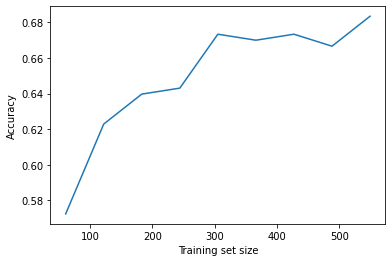

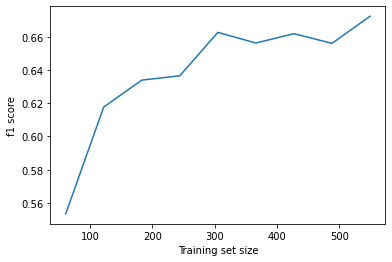

In [33]:
# Logistic regression
accuracy_logreg = []
f1_logreg = []

for border in indexes:
    logreg_cf.fit(X_train[:border,], y_train[:border])
    acc = logreg_cf.score(X_test, y_test)
    accuracy_logreg.append(acc)
    
    y_pred = logreg_cf.predict(X_test)
    f1_sc = f1_score(y_test, y_pred, average="macro")
    f1_logreg.append(f1_sc)

plt.plot(indexes, accuracy_logreg)
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.show()

plt.plot(indexes, f1_logreg)
plt.xlabel("Training set size")
plt.ylabel("f1 score")
plt.show()

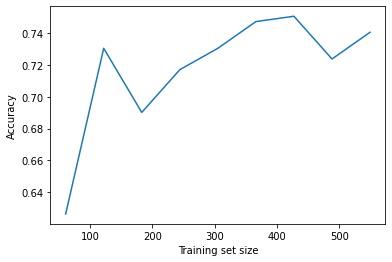

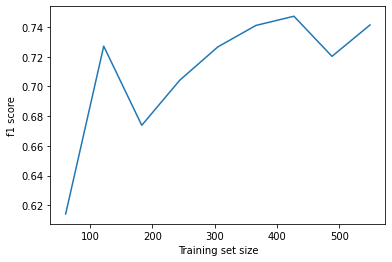

In [34]:
# Random forest
accuracy_rf = []
f1_rf = []

for border in indexes:
    rf_cf.fit(X_train[:border,], y_train[:border])
    acc = rf_cf.score(X_test, y_test)
    accuracy_rf.append(acc)
    
    y_pred = rf_cf.predict(X_test)
    f1_sc = f1_score(y_test, y_pred, average="macro")
    f1_rf.append(f1_sc)

plt.plot(indexes, accuracy_rf)
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.show()

plt.plot(indexes, f1_rf)
plt.xlabel("Training set size")
plt.ylabel("f1 score")
plt.show()

Вывод: качество предсказания модели растет с ростом обучающей выборки